In [1]:
# Place here the same 6-digit number you selected for the first coursework. 
# Make sure that you keep a copy of this number and avoid trivial numbers, such as 000000 or 123456 -- thank you!
# Not today

# Assignment 2 - Regression and Classification

Second assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This coursework aims to provide students with a comprehensive understanding of linear regression with polynomial basis functions and classification with K-nearest neighbours. Specifically, students will learn about key concepts related to the model's generalisation ability by changing the degree of the polynomial and the size of the dataset. In the second part of the coursework, students will delve into classification using the K-nearest neighbours algorithm. Finally, students will be introduced to the concept of using a validation set to select the optimal value of $K$ for their classification model. By the end of this coursework, students will have gained a solid understanding of these key concepts and be equipped with the skills to apply them in practical scenarios.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Polynomial Fitting Visualisation](#Polynomial-Fitting-Visualisation) (50%)
2. [Classification with KNN](#Classification-with-KNN) (50%)

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle as pkl
from sklearn.datasets import load_digits

# Polynomial Fitting Visualisation
In this exercise you will explore the effect that the degree of the polynomial and the size of the training data has on the model's performance and generalisation ability.

1. Generate a 2D dataset of 15 points $(x_i,y_i)$ for $i=1..15$ using a sine wave perturbed by a small gaussian noise --- this is very similar to what you did in the lab.
    - The $x_i$ should be equally spaced in the $[0-10]$ interval 
    - Use: $y_i = 4*sin(x_i) + \epsilon$, where $\epsilon$ is gaussian noise (with $\mu=0$ and $\sigma=1$).
    - To ensure reproducibility of your results, use (provided below): 
    `rng = np.random.default_rng(13)` and
    `random_state = np.random.RandomState(13)`
    
2. Split the points randomly into a training and testing sets of size 10 and 5, respectively.
    
3. Learn the weights of the linear regression for  polynomial models of degree $M$ for $M = 0..9$ . For each value of $M$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $M$. Your figure should be similar to Figure 1 from the Coursework document.

4. In the last part of this exercise, you will have to create more points for training (using the same sine wave perturbed by a small gaussian noise as described in point 1). For testing, you will continue to use the same 5 points you used in points 1 to 3. Learn the weights of the linear regression for  polynomial models of degree $M=9$ for training sets of size $N$ with $N=10:500:10$ (that is, from $N=10$ to $N=500$ in steps of $10$). For each value of $N$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $N$. Your figure should be similar to Figure 2 from the Coursework document.

* Note that for parts 3 and 4 you are supposed to write your code from scratch and you cannot use existing functions such as `PolynomialFeatures`, `LinearRegression` or `mean_squared_error`.
* _Observation: in this exercise we are not using the validation set because our goal is not to choose a specific model but rather to analyse the behaviour of the family of models._

### Generate the data

In [41]:
rng = np.random.default_rng(13)
random_state = np.random.RandomState(13)

In [42]:
# your code goes here:
x_points = np.linspace(0, 10, 15)
y_points = 4 * np.sin(x_points) + rng.normal(0,1,size=15)

### Split the points into training and testing
Feel free to use `train_test_split(x, y, test_size = ?, random_state = random_state)`, remember to calculate the right proportion for the `test_size` so that you end up with 5 points in the testing set.

In [43]:
# your code goes here:
x_train, x_test, y_train, y_test = train_test_split(x_points, y_points, test_size = 0.3, random_state = random_state)

### Degree vs. RMSE
Generate the plot (as in __Figure 1__) of the RMSE during training and testing at different values of of the polynomial degree $M$.

In [44]:
# First i'll define a function for regression
def linear_regression(x, y, apply_bias = True):
    if apply_bias:
        x = np.insert(x, 0, 1, axis=1) # Applies a bias column to our features
    w = np.dot(np.dot(np.linalg.inv(np.dot(x.transpose(), x)), x.transpose()), y)
    return w

# One for calculating the RMSE
def rmse(predicted_y, true_y):
    return np.sqrt(np.mean((predicted_y - true_y)**2))

# And one for creating the phi matrix
def polinomial_base(x, m):
    phi = np.zeros((x.shape[0], m+1))
    for i in range(x.shape[0]):
        for j in range(m+1):
            phi[i, j] = x[i]**j
    return phi

<Axes: xlabel='Degree', ylabel='RMSE'>

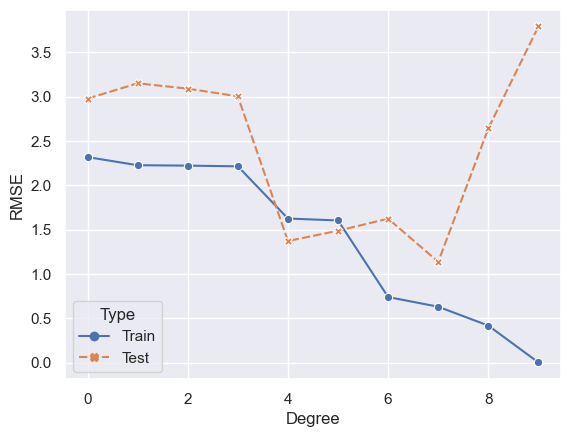

In [47]:
# Instead of calculating the phi matrices over and over, i'll just calculate it once and use it column-wise
phi_train = polinomial_base(x_train, 9) 
phi_test = polinomial_base(x_test, 9)

# I'll use these lists because seaborn works better plotting everything at once with a dataframe and hue, instead of plotting each lineplot separately
rmse_array = []
degree_array = []
type_array = []

# Then calculate the MSE's
for m in range(10):
    w = linear_regression(phi_train[:, :m+1], y_train, apply_bias = False) # Calculating the weights using pieces of the phi matrix

    pred_train = np.dot(phi_train[:, :m+1], w)
    rmse_array.append(rmse(pred_train, y_train))
    degree_array.append(m)
    type_array.append("Train")

    pred_test = np.dot(phi_test[:, :m+1], w)
    rmse_array.append(rmse(pred_test, y_test))
    degree_array.append(m)
    type_array.append("Test")

rmse_df = pd.DataFrame({"RMSE": rmse_array, "Degree": degree_array, "Type": type_array})

sns.set()
sns.lineplot(data=rmse_df, x="Degree", y="RMSE", hue="Type", style="Type", markers=True)

### Training set size vs. RMSE
Generate the plot (as in __Figure 2__) of the RMSE during training and testing at different training set sizes $N$.

<Axes: xlabel='Training Size', ylabel='RMSE'>

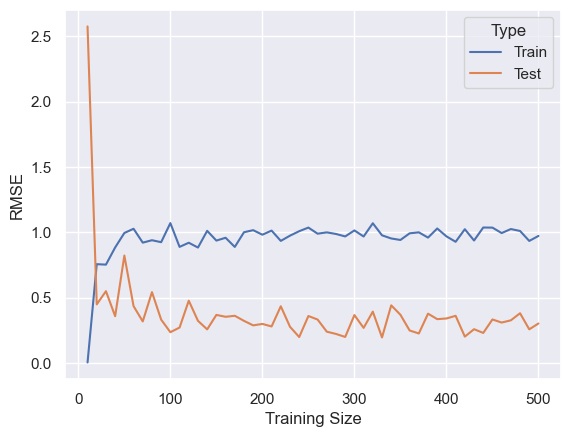

In [48]:
# your code goes here:
rmse_n = []
n_size = []
type_n = []

for n in range(10,501,10):
    x_n = np.linspace(0, 10, n)
    y_n = 4 * np.sin(x_n) + rng.normal(0,1,size=n)
    phi_n_train = polinomial_base(x_n, 9)

    w_n = linear_regression(phi_n_train, y_n, apply_bias = False)

    train_n = np.dot(phi_n_train, w_n)
    rmse_n.append(rmse(train_n, y_n))
    n_size.append(n)
    type_n.append("Train")

    phi_n_test = polinomial_base(x_test, 9)

    test_n = np.dot(phi_n_test, w_n)
    rmse_n.append(rmse(test_n, y_test))
    n_size.append(n)
    type_n.append("Test")

rmse_n_df = pd.DataFrame({"RMSE": rmse_n, "Training Size": n_size, "Type": type_n})

sns.lineplot(data=rmse_n_df, x="Training Size", y="RMSE", hue="Type")

# Classification with KNN
In this exercise you will implement the K-nearest neighbours (K-NN) algorithm for binary classification without using any Python libraries such as scikit-learn. Use it to classify the Ionosphere dataset. You will also need to determine the optimal value of $K$ using the F1-score on a validation set and report the test set performance based on the F1-score.

Dataset: The Ionosphere dataset contains radar data collected from a radar system in Goose Bay, Canada. The dataset contains 351 observations, with 34 attributes each. The last column represents the class, which is either "good" (1) or "bad" (0).

Specifically:
1. Load the Ionosphere dataset into a data frame and split it into a training set ($80\%$), a validation set ($10\%$), and a testing set ($10\%$).
    
2. You will write code that implements the K-NN algorithm for binary classification. Use Euclidean distance as the distance metric.
    - _Obs: it is better if you take only odd values of K, considering you are predicting the class based on the majority of the neighbours._


3. Use the K-NN algorithm on the training set for a range of values of $K$ and evaluate its performance on the validation set using the F1-score. Plot the F1-score on the validation set against the range of values that were tried for $K$. Your plot should look like Figure 3. Choose the value of $K$ that gives the best F1-score.
    - You will also have to implement the F1-score from scratch.


4. Report the F1-score of the K-NN algorithm on the test set using the selected value of $K$.


* __Note:__ You are not allowed to use any Python libraries such as scikit-learn to implement the K-NN algorithm or to calculate distances. You may use numpy or other basic libraries for matrix operations.

* As a reminder, the F1-score is calculated as follows: $F1 = 2 \times \frac{precision \times recall}{precision + recall}$ or $F1 = \frac{TP}{TP + \frac{1}{2} (FP + FN)}$
    
    

### Preparing the dataset

Load the dataset into a pandas `DataFrame`, split the features from the target variable, and generate the training, validation and testing sets.

In [49]:
iono_df = pd.read_csv('ionosphere_data_cleaned.csv')

Let's inspect the dataset. There are 34 features and one target column

In [50]:
iono_df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,label
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


We can inspect the class distribution by using `value_counts()` on the target column

In [51]:
iono_df.label.value_counts()

1    225
0    126
Name: label, dtype: int64

Let's separate our features from our target column

In [52]:
X_io = iono_df.values[:, :-1]
y_io = iono_df.values[:, -1]

Now you will write code to split the data into training ($80\%$), validation ($10\%$), and testing ($10\%$). 

You can use `train_test_split()` but make sure to calculate the right proportions and remember that this only returns 2 different sets, not 3.

In [53]:
# set the random_state for reproducibilty of your results
random_state = 42

In [54]:
# your code goes here:
x_train, x_rest, y_train, y_rest = train_test_split(X_io, y_io, test_size = 0.2, random_state = random_state)
x_valid, x_test, y_valid, y_test = train_test_split(x_rest, y_rest, test_size = 0.5, random_state = random_state)

### Here you will implement the KNN algorithm using the euclidean distance

In [55]:
def euclidean_dist(x1, x2):
    # your code goes here:
    return np.sqrt(np.sum((x1 - x2)**2))    

In [64]:
def knn_predict(x_train, x_test, y_train, k):
    # your code goes here:
    test_predict = np.zeros(x_test.shape[0])

    for datapoint in range(x_test.shape[0]):
        # Calculating the distances of each datapoint to the training points
        distances = np.array([euclidean_dist(x_train[training_point], x_test[datapoint]) for training_point in range(x_train.shape[0])]) 
        
        # Counting how many of the k-nearest neighbours are 0's, how many are 1's, and setting the prediction according to the highest
        k_nearest = np.argsort(distances)[:k]
        test_predict[datapoint] = np.argmax([np.count_nonzero(y_train[k_nearest] == 0), np.count_nonzero(y_train[k_nearest] == 1)])

    return test_predict	

### Select the optimal $K$ by plotting the F1 score in the validation set at different values of $K$

First create a function that calculates the F1-score

In [65]:
def calculate_f1_score(predicted_y, true_y):
    # your code goes here:
    tp, fp, tn, fn = 0, 0, 0, 0  
    for i in range(true_y.shape[0]):
        if predicted_y[i] > true_y[i]: fp += 1
        elif predicted_y[i] < true_y[i]: fn += 1
        elif predicted_y[i] == 1: tp += 1
        else: tn += 1

    return tp/(tp + (fn + fp)/2)    

Generate the plot and select the optimal $K$

15

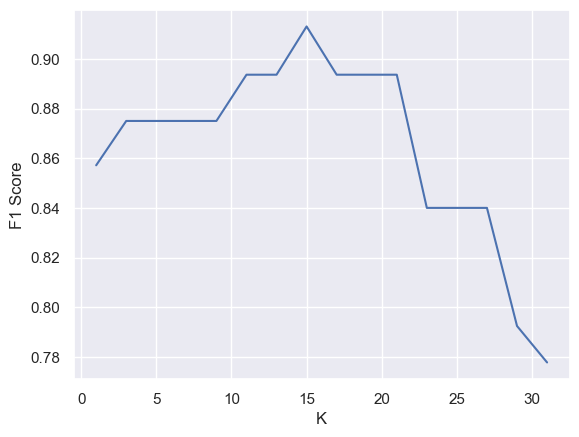

In [70]:
# your code goes here:
k_range = []
f1_scores = []
for k in range(1,32,2):
    valid_predict = knn_predict(x_train, x_valid, y_train, k)
    f1_scores.append(calculate_f1_score(valid_predict, y_valid))
    k_range.append(k)

optimal_k = k_range[np.argmax(f1_scores)]

data_df = pd.DataFrame({"F1 Score":f1_scores, "K":k_range})
sns.lineplot(data_df,x="K",y="F1 Score")
optimal_k

Calculate the test set performance using the optimal $K$

In [71]:
# your code goes here:
test_prediction = knn_predict(x_train, x_test, y_train, optimal_k)
optimal_f1 = calculate_f1_score(test_prediction, y_test)

print("Predicted Values:\n", test_prediction)
print("Prediction Score: ", optimal_f1)

Predicted Values:
 [0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
Prediction Score:  0.8627450980392157
